In [16]:
import pandas as pd
import statistics
from scipy import stats
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [17]:
fronteras = pd.read_csv('https://raw.githubusercontent.com/quirozem/fronteras20211/main/fronteras.csv', sep=',')

measure = fronteras["Measure"] == "Pedestrians"
lugar = fronteras["Port Name"] == "El Paso"
fronteras["Date"] = pd.to_datetime(fronteras["Date"])
años = (fronteras["Date"] >= '01/01/2015 00:00:00') & (fronteras["Date"] <= '12/01/2019 00:00:00')
fronteras = fronteras[años&measure&lugar]

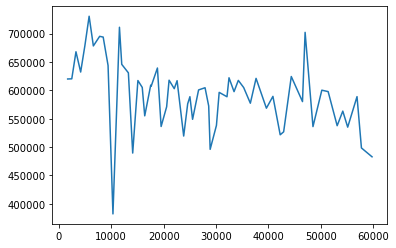

In [18]:
plt.plot(fronteras['Value'])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

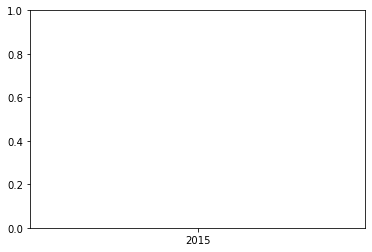

In [23]:
años = fronteras.groupby(fronteras["Date"].dt.strftime("%y"))["Value"].mean()
median_años = años.to_numpy()
nombre_años = ["2015","2016","2017","2018","2019"]
total = np.append(median_años, fronteras["Value"].median())
plt.bar(nombre_años, total)
plt.show()

In [20]:
def estadistica(fronteras):
    print(fronteras["Value"].describe())
    print("Mediana:  ",statistics.median(fronteras["Value"]))
    print("Moda:  ",statistics.mode(fronteras["Value"]))
    print("Media geométrica:  ",stats.gmean(fronteras["Value"]))
    print("Media armónica:  ",statistics.harmonic_mean(fronteras["Value"]))
    print("Rango:  ",(max(fronteras["Value"]))-(min(fronteras["Value"])))
    print("Rango intercuartil:  ",stats.iqr(fronteras["Value"]))
    print("Varianza:  ",statistics.pvariance(fronteras["Value"]))
    print("Curtosis:  ",stats.kurtosis(fronteras["Value"]))  

In [21]:
estadistica(fronteras)

count        60.000000
mean     593483.900000
std       62009.604167
min      382224.000000
25%      561339.250000
50%      599067.000000
75%      621393.000000
max      730640.000000
Name: Value, dtype: float64
Mediana:   599067.0
Moda:   620043
Media geométrica:   590125.6156413547
Media armónica:   586538.150884251
Rango:   348416
Rango intercuartil:   60053.75
Varianza:   3781104492.09
Curtosis:   1.2252308079726228
